# To begin the analysis on the short term rental start up data for Pillow Palooza. I have divided the analysis into different sections

* No 1 section is the data importation

In [198]:
import pandas as pd

In [199]:
price = r"C:\Users\obafe\OneDrive\Documents\Mastery project 2\prices.csv"
reviews = r"C:\Users\obafe\OneDrive\Documents\Mastery project 2\review.csv"
room_types = r"C:\Users\obafe\OneDrive\Documents\Mastery project 2\room_types.csv"
df = pd.read_csv(price)
df1 = pd.read_csv(reviews)
df2 = pd.read_csv(room_types)

In [200]:

print(df.head(2))
print(df1.head(2))
print(df2.head(2))



   Unnamed: 0  listing_id  price    borough neighbourhood  price_per_month   
0           0        2595    225  Manhattan       Midtown      6843.750000  \
1           1        3831     89   Brooklyn  Clinton Hill      2707.083333   

   latitude  longitude  
0  40.75362  -73.98377  
1  40.68514  -73.95976  
   Unnamed: 0  listing_id    host_name          last_review  minimum_nights   
0           0        2595     Jennifer  2019-05-21 00:00:00               1  \
1           1        3831  LisaRoxanne  2019-07-05 00:00:00               1   

   number_of_reviews  reviews_per_month  calculated_host_listings_count   
0                 45               0.38                               2  \
1                270               4.64                               1   

   availability_365  booked_days_365  
0               355               10  
1               194              171  
   Unnamed: 0  listing_id                      description        room_type
0           0        2595        

* The second section will be data cleaning to make the data good for the analysis

In [201]:
# I am going to remove the Unnamed: 0 column as it is not useful for the analysis
del df['Unnamed: 0']
del df1['Unnamed: 0']
del df2['Unnamed: 0']

In [202]:
print(df.head(2))
print(df1.head(2))
print(df2.head(2))


   listing_id  price    borough neighbourhood  price_per_month  latitude   
0        2595    225  Manhattan       Midtown      6843.750000  40.75362  \
1        3831     89   Brooklyn  Clinton Hill      2707.083333  40.68514   

   longitude  
0  -73.98377  
1  -73.95976  
   listing_id    host_name          last_review  minimum_nights   
0        2595     Jennifer  2019-05-21 00:00:00               1  \
1        3831  LisaRoxanne  2019-07-05 00:00:00               1   

   number_of_reviews  reviews_per_month  calculated_host_listings_count   
0                 45               0.38                               2  \
1                270               4.64                               1   

   availability_365  booked_days_365  
0               355               10  
1               194              171  
   listing_id                      description        room_type
0        2595            Skylit Midtown Castle  entire home/apt
1        3831  Cozy Entire Floor of Brownstone  entir

In [203]:
# I am going to look how many columns and rows we have
print(df.shape, df1.shape, df2.shape)

(25202, 7) (25209, 9) (25209, 3)


In [204]:
# now I am going to merge the three separate data together by using the inner join
# Merging the df, df1, and df2 files on listing_id
merge_df = df.merge(df1, on='listing_id', how='inner')
merge_df = merge_df.merge(df2, on='listing_id', how='inner')

In [205]:
merge_df.head()

,listing_id,price,borough,neighbourhood,price_per_month,latitude,longitude,host_name,last_review,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,booked_days_365,description,room_type
0,2595,225,Manhattan,Midtown,6843.750000,40.75362,-73.98377,Jennifer,2019-05-21 00:00:00,1,45,0.38,2,355,10,Skylit Midtown Castle,entire home/apt
1,3831,89,Brooklyn,Clinton Hill,2707.083333,40.68514,-73.95976,LisaRoxanne,2019-07-05 00:00:00,1,270,4.64,1,194,171,Cozy Entire Floor of Brownstone,entire home/apt
2,5099,200,Manhattan,Murray Hill,6083.333333,40.74767,-73.97500,Chris,2019-06-22 00:00:00,3,74,0.59,1,129,236,Large Cozy 1 BR Apartment In Midtown East,entire home/apt
3,5178,79,Manhattan,Hell's Kitchen,2402.916667,40.76489,-73.98493,Shunichi,2019-06-24 00:00:00,2,430,3.47,1,220,145,Large Furnished Room Near B'way,private room
4,5238,150,Manhattan,Chinatown,4562.500000,40.71344,-73.99037,Ben,2019-06-09 00:00:00,1,160,1.33,4,188,177,Cute & Cozy Lower East Side 1 bdrm,entire home/apt


In [206]:
merge_df.values

array([[2595, 225, 'Manhattan', ..., 10, 'Skylit Midtown Castle',
        'entire home/apt'],
       [3831, 89, 'Brooklyn', ..., 171,
        'Cozy Entire Floor of Brownstone', 'entire home/apt'],
       [5099, 200, 'Manhattan', ..., 236,
        'Large Cozy 1 BR Apartment In Midtown East', 'entire home/apt'],
       ...,
       [36438336, 235, 'Staten Island', ..., 278, 'Seas The Moment',
        'private room'],
       [36442252, 100, 'Bronx', ..., 325,
        '1B-1B apartment near by Metro', 'entire home/apt'],
       [36455809, 30, 'Brooklyn', ..., 364,
        'Cozy Private Room in Bushwick, Brooklyn', 'private room']],
      dtype=object)

In [207]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25202 entries, 0 to 25201
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_id                      25202 non-null  int64  
 1   price                           25202 non-null  int64  
 2   borough                         25202 non-null  object 
 3   neighbourhood                   25202 non-null  object 
 4   price_per_month                 25202 non-null  float64
 5   latitude                        25202 non-null  float64
 6   longitude                       25202 non-null  float64
 7   host_name                       25194 non-null  object 
 8   last_review                     25202 non-null  object 
 9   minimum_nights                  25202 non-null  int64  
 10  number_of_reviews               25202 non-null  int64  
 11  reviews_per_month               25202 non-null  float64
 12  calculated_host_listings_count  

In [208]:
merge_df.isnull().sum()

listing_id                         0
price                              0
borough                            0
neighbourhood                      0
price_per_month                    0
latitude                           0
longitude                          0
host_name                          8
last_review                        0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
booked_days_365                    0
description                       10
room_type                          0
dtype: int64

In [209]:
# For this data, we have a very good dataset and a very small null values.
# I will substitute the null values in both host_name and description with unknown since this is a very small value.
merge_df['host_name'].fillna('unknown', inplace=True)
merge_df['description'].fillna('unknown', inplace=True)

In [210]:
merge_df.dtypes

listing_id                          int64
price                               int64
borough                            object
neighbourhood                      object
price_per_month                   float64
latitude                          float64
longitude                         float64
host_name                          object
last_review                        object
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
booked_days_365                     int64
description                        object
room_type                          object
dtype: object

In [211]:
# Our last_review data type is in object, I would cast it as datetime
merge_df['last_review'] = pd.to_datetime(merge_df['last_review'])

In [212]:
merge_df.columns

Index(['listing_id', 'price', 'borough', 'neighbourhood', 'price_per_month',
       'latitude', 'longitude', 'host_name', 'last_review', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'booked_days_365',
       'description', 'room_type'],
      dtype='object')

# Now we have all our data cleaned, we can start with the business questions and exploratory data analysis


What are the most popular neighborhoods for short-term rentals in New York City?

What is the average rental price for short-term rentals in New York City, and how does it vary by neighborhood and property type?

What are the most commonly rented property types on Airbnb in New York City, and how does this vary by neighborhood?

What is the average length of stay for short-term rentals in New York City, and how does this vary by neighborhood and property type?

How has demand for short-term rentals in New York City changed over time, and are there any seasonal trends that could impact business decisions?


In [213]:
#1. What are the most popular neighborhoods for short-term rentals in New York City?
popular_neighborhoods = merge_df['neighbourhood'].value_counts().head(3)
print("Most popular neighborhoods for short-term rentals in New York City:")
print(popular_neighborhoods)


Most popular neighborhoods for short-term rentals in New York City:
neighbourhood
Bedford-Stuyvesant    2206
Williamsburg          1853
Harlem                1435
Name: count, dtype: int64


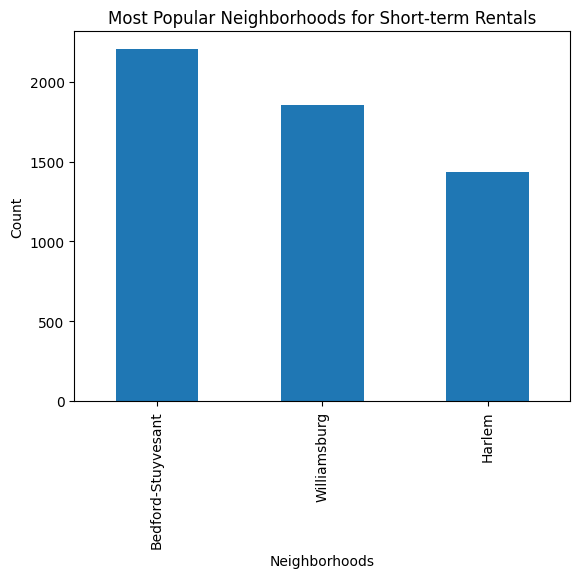

In [214]:
import matplotlib.pyplot as plt

popular_neighborhoods.plot(kind='bar')
plt.xlabel('Neighborhoods')
plt.ylabel('Count')
plt.title('Most Popular Neighborhoods for Short-term Rentals')
plt.show()


In [215]:
# 2. What is the average rental price for short-term rentals in New York City, and how does it vary by neighborhood and property type?
average_price = merge_df.groupby(['neighbourhood', 'room_type'])['price'].mean().reset_index()
print("Average rental price for short-term rentals in New York City, by neighborhood and property type:")
average_price = average_price.sort_values('price', ascending= False)
print(average_price)


Average rental price for short-term rentals in New York City, by neighborhood and property type:
         neighbourhood        room_type       price
387           Sea Gate  entire home/apt  805.000000
438            Tribeca  entire home/apt  450.660000
24             Bayside  entire home/apt  398.909091
172  Flatiron District  entire home/apt  386.833333
394               SoHo  entire home/apt  383.834646
..                 ...              ...         ...
176          Flatlands      shared room   22.000000
454           Van Nest      shared room   20.000000
386      Schuylerville      shared room   20.000000
203       Graniteville     private room   20.000000
360      Randall Manor      shared room   13.000000

[489 rows x 3 columns]


In [216]:
# Business question 4: What is the average length of stay for short-term rentals in New York City,
# and how does it vary by neighborhood and property type?
average_length_of_stay = merge_df.groupby(['neighbourhood', 'room_type'])['minimum_nights'].mean()
print("Average length of stay for short-term rentals in New York City, by neighborhood and property type:")
print(average_length_of_stay)

Average length of stay for short-term rentals in New York City, by neighborhood and property type:
neighbourhood  room_type      
Allerton       entire home/apt     2.285714
               private room        2.000000
Arden Heights  entire home/apt    12.000000
               private room        2.000000
Arrochar       entire home/apt     1.777778
                                    ...    
Woodlawn       entire home/apt     1.500000
               private room        1.250000
Woodside       entire home/apt     2.978723
               private room       13.012658
               shared room         2.000000
Name: minimum_nights, Length: 489, dtype: float64


In [238]:
# 3 What are the most commonly rented property types on Airbnb in New York City, and how does this vary by neighborhood?
common_property_types = merge_df.groupby(['neighbourhood', 'room_type']).size().reset_index(name='count')
most_common_property_types = common_property_types.groupby('neighbourhood').apply(lambda x: x[x['count'] == x['count'].max()]['room_type']).reset_index(name='most_common_property_type').value_counts('most_common_property_type')
print("Most commonly rented property types on Airbnb in New York City, by neighborhood:")
print(most_common_property_types)


Most commonly rented property types on Airbnb in New York City, by neighborhood:
most_common_property_type
entire home/apt    116
private room       108
shared room          4
Name: count, dtype: int64


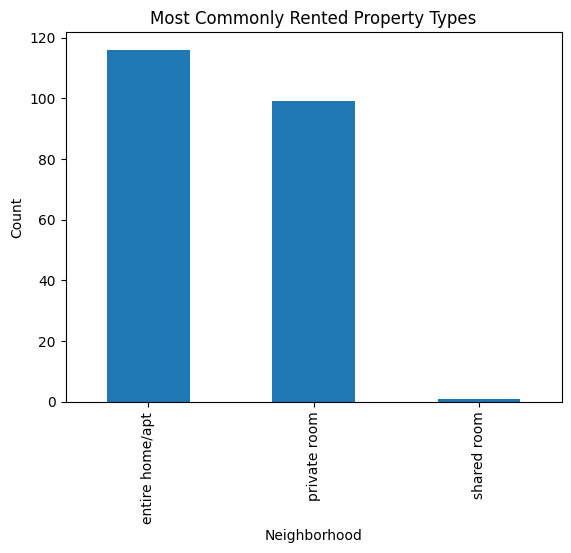

In [233]:
common_property_types.value_counts().plot(kind='bar')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.title('Most Commonly Rented Property Types')
plt.show()


In [219]:
# Business question 3: What are the most commonly rented property types on Airbnb in New York City,
# and how does this vary by neighborhood?
common_property_types = merge_df.groupby('neighbourhood')['room_type'].apply(lambda x: x.mode()[0])
print("Most commonly rented property types on Airbnb in New York City, by neighborhood:")
print(common_property_types)

Most commonly rented property types on Airbnb in New York City, by neighborhood:
neighbourhood
Allerton              private room
Arden Heights      entire home/apt
Arrochar              private room
Arverne            entire home/apt
Astoria               private room
                        ...       
Willowbrook        entire home/apt
Windsor Terrace    entire home/apt
Woodhaven             private room
Woodlawn           entire home/apt
Woodside              private room
Name: room_type, Length: 216, dtype: object


In [220]:
# Business question 4: What is the average length of stay for short-term rentals in New York City,
# and how does it vary by neighborhood and property type?

# Grouping by neighborhood and property type and calculating the average length of stay
average_length_of_stay = merge_df.groupby(['neighbourhood', 'room_type'])['minimum_nights'].mean()

# Sorting the values in descending order
average_length_of_stay_sorted = average_length_of_stay.sort_values(ascending=False)

# Selecting the top 10 values
top_10_average_length_of_stay = average_length_of_stay_sorted.head(10)

# Printing the result
print("Top 10 average length of stay for short-term rentals in New York City, by neighborhood and property type:")
print(top_10_average_length_of_stay)


Top 10 average length of stay for short-term rentals in New York City, by neighborhood and property type:
neighbourhood      room_type      
Claremont Village  entire home/apt    32.000000
Great Kills        entire home/apt    17.250000
East Flatbush      shared room        15.500000
Lower East Side    shared room        14.866667
Hunts Point        private room       14.750000
Greenwich Village  private room       14.235294
Vinegar Hill       entire home/apt    14.000000
Woodside           private room       13.012658
Fordham            entire home/apt    13.000000
Murray Hill        entire home/apt    12.222222
Name: minimum_nights, dtype: float64


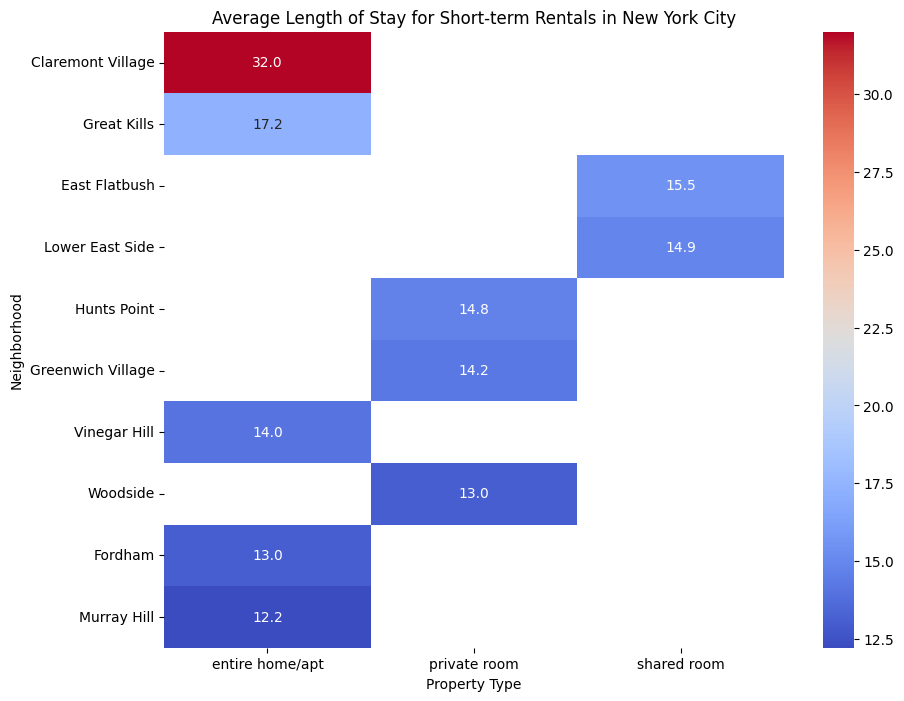

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reshaping the data for heatmap
average_length_of_stay_heatmap = top_10_average_length_of_stay.unstack()

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(average_length_of_stay_heatmap, cmap='coolwarm', annot=True, fmt=".1f")

# Adjusting the plot labels and title
plt.xlabel('Property Type')
plt.ylabel('Neighborhood')
plt.title('Average Length of Stay for Short-term Rentals in New York City')

# Displaying the heatmap
plt.show()


In [222]:
# Business question 5: How has demand for short-term rentals in New York City changed over time,
# and are there any seasonal trends that could impact business decisions?
merge_df['last_review'] = pd.to_datetime(merge_df['last_review'])
merge_df['month'] = merge_df['last_review'].dt.month
demand_over_time = merge_df.groupby('month')['number_of_reviews'].sum()
print("Demand for short-term rentals in New York City over time:")
print(demand_over_time)

Demand for short-term rentals in New York City over time:
month
1     20750
2      7215
3     11307
4     24828
5     86465
6    619567
7    243262
Name: number_of_reviews, dtype: int64


Text(0.5, 1.0, 'Demand for Short-term Rentals in New York City Over Time')

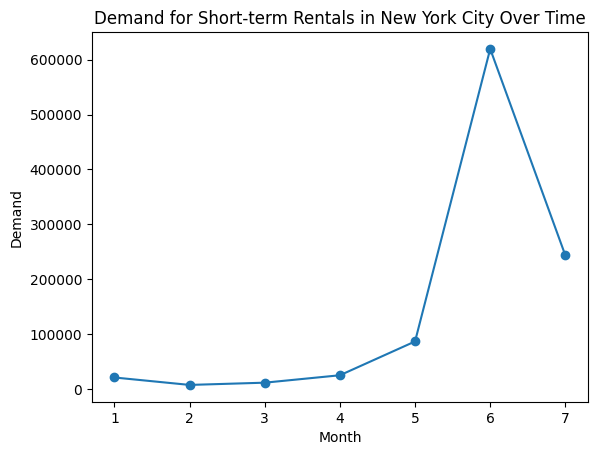

In [223]:
import matplotlib.pyplot as plt

# Code to calculate demand_over_time as mentioned in the previous response

# Create line chart
plt.plot(demand_over_time.index, demand_over_time.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Demand for Short-term Rentals in New York City Over Time')


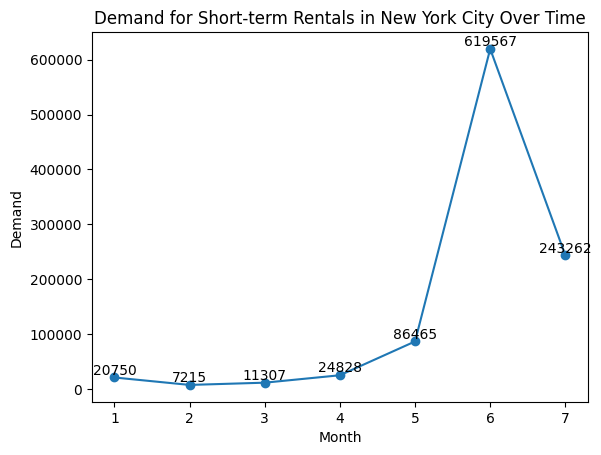

In [239]:
import matplotlib.pyplot as plt

# Code to calculate demand_over_time as mentioned in the previous response

# Create line chart
plt.plot(demand_over_time.index, demand_over_time.values, marker='o')

# Add demand number for each month
for x, y in zip(demand_over_time.index, demand_over_time.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Adjust the plot labels and title
plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Demand for Short-term Rentals in New York City Over Time')

# Display the line plot
plt.show()


In [224]:
# Code to calculate demand_over_time as mentioned in the previous response

# Find the maximum demand value and its corresponding index
max_demand = demand_over_time.max()
max_demand_month = demand_over_time.idxmax()

# Filter the DataFrame to include only the rows with the month of maximum demand
max_demand_data = merge_df[merge_df['month'] == max_demand_month]

# Find the most common borough, neighbourhood, and room type during the month of maximum demand
common_borough = max_demand_data['borough'].mode().values[0]
common_neighbourhood = max_demand_data['neighbourhood'].mode().values[0]
common_room_type = max_demand_data['room_type'].mode().values[0]

# Print the results
print("Borough with highest demand during the month of maximum demand:", common_borough)
print("Neighbourhood with highest demand during the month of maximum demand:", common_neighbourhood)
print("Room type with highest demand during the month of maximum demand:", common_room_type)


Borough with highest demand during the month of maximum demand: Manhattan
Neighbourhood with highest demand during the month of maximum demand: Bedford-Stuyvesant
Room type with highest demand during the month of maximum demand: entire home/apt


In [225]:
merge_df.head(10)

,listing_id,price,borough,neighbourhood,price_per_month,latitude,longitude,host_name,last_review,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,booked_days_365,description,room_type,month
0,2595,225,Manhattan,Midtown,6843.750000,40.75362,-73.98377,Jennifer,2019-05-21,1,45,0.38,2,355,10,Skylit Midtown Castle,entire home/apt,5
1,3831,89,Brooklyn,Clinton Hill,2707.083333,40.68514,-73.95976,LisaRoxanne,2019-07-05,1,270,4.64,1,194,171,Cozy Entire Floor of Brownstone,entire home/apt,7
2,5099,200,Manhattan,Murray Hill,6083.333333,40.74767,-73.97500,Chris,2019-06-22,3,74,0.59,1,129,236,Large Cozy 1 BR Apartment In Midtown East,entire home/apt,6
3,5178,79,Manhattan,Hell's Kitchen,2402.916667,40.76489,-73.98493,Shunichi,2019-06-24,2,430,3.47,1,220,145,Large Furnished Room Near B'way,private room,6
4,5238,150,Manhattan,Chinatown,4562.500000,40.71344,-73.99037,Ben,2019-06-09,1,160,1.33,4,188,177,Cute & Cozy Lower East Side 1 bdrm,entire home/apt,6
5,5295,135,Manhattan,Upper West Side,4106.250000,40.80316,-73.96545,Lena,2019-06-22,5,53,0.43,1,6,359,Beautiful 1br on Upper West Side,entire home/apt,6
6,5441,85,Manhattan,Hell's Kitchen,2585.416667,40.76076,-73.98867,Kate,2019-06-23,2,188,1.50,1,39,326,Central Manhattan/near Broadway,private room,6
7,5803,89,Brooklyn,South Slope,2707.083333,40.66829,-73.98779,Laurie,2019-06-24,4,167,1.34,3,314,51,"Lovely Room 1, Garden, Best Area, Legal rental",private room,6
8,6021,85,Manhattan,Upper West Side,2585.416667,40.79826,-73.96113,Claudio,2019-07-05,2,113,0.91,1,333,32,Wonderful Guest Bedroom in Manhattan for SINGLES,private room,7
9,6848,140,Brooklyn,Williamsburg,4258.333333,40.70837,-73.95352,Allen & Irina,2019-06-29,2,148,1.20,1,46,319,Only 2 stops to Manhattan studio,entire home/apt,6


In [226]:
# Questions and answers to the quizes
# 1. What is the most common room type in NYC Airbnb listings?This question is required. 
print(merge_df['room_type'].value_counts())

# 2. What is the average price of the listings by room type "shared room"?This question is required. 
mean_shared_room_price = merge_df.loc[merge_df['room_type'] == 'shared room', 'price'].mean()
print('The average shared room is ',mean_shared_room_price)

# 3. Which borough has the highest average price per month?This question is required. 
average_price_per_month_by_borough = merge_df.groupby('borough')['price_per_month'].mean()
highest_avg_price_borough = average_price_per_month_by_borough.idxmax()
print(highest_avg_price_borough)

# 4. How many listings of each room type are in each borough?This question is required. 
listing_count = merge_df.groupby('borough')['room_type'].value_counts()
print(listing_count)

# 5. How many listings in each room type category have a price greater than $500 per night?This question is required. 
listings_above_500 = merge_df[merge_df['price'] > 500].groupby('room_type')['listing_id'].count()
print(listings_above_500)

# 6. What is the distribution of listing prices by borough?This question is required. 
distribution_of_listing_price_by_borough= merge_df.groupby('borough')['price'].describe()
print(distribution_of_listing_price_by_borough)

# 7. What is the estimated amount of revenue generated by hosts in each borough?This question is required.
revenue_by_borough = merge_df.groupby('borough').apply(lambda x: (x['price_per_month'] * x['availability_365']).sum()).reset_index(name='estimated_revenue')
print(revenue_by_borough)

# 8. What is the average price per month for listings in each neighborhood?
avg_price_per_month_neighborhood = merge_df.loc[merge_df['neighbourhood'] == 'Sea Gate', 'price_per_month'].mean()
print(avg_price_per_month_neighborhood)

# 9. 

# 10. How do the estimated book days correlate with the price of an Airbnb listing in New York City?
correlation = merge_df['booked_days_365'].corr(merge_df['price'])
print(correlation)


room_type
entire home/apt    13266
private room       11351
shared room          585
Name: count, dtype: int64
The average shared room is  53.64786324786325
Manhattan
borough        room_type      
Bronx          private room        403
               entire home/apt     261
               shared room          33
Brooklyn       entire home/apt    5367
               private room       4906
               shared room         187
Manhattan      entire home/apt    6170
               private room       3901
               shared room         251
Queens         private room       2009
               entire home/apt    1335
               shared room         112
Staten Island  entire home/apt     133
               private room        132
               shared room           2
Name: count, dtype: int64
room_type
entire home/apt    395
private room        19
shared room          1
Name: listing_id, dtype: int64
                 count        mean         std   min   25%    50%    75%   
borou

In [227]:
#How many listings for each room_type have a reviews_per_month > 1.5?
merge_df.columns

Index(['listing_id', 'price', 'borough', 'neighbourhood', 'price_per_month',
       'latitude', 'longitude', 'host_name', 'last_review', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'booked_days_365',
       'description', 'room_type', 'month'],
      dtype='object')

In [228]:
listings_above_rev = merge_df[merge_df['reviews_per_month'] > 1.5].groupby('room_type')['listing_id'].count()

In [229]:
print(listings_above_rev)

room_type
entire home/apt    6294
private room       5789
shared room         298
Name: listing_id, dtype: int64


In [230]:
merge_df['availability_365'].sort_values(ascending=False)

19696    365
22588    365
22615    365
17210    365
17209    365
        ... 
9592       0
7469       0
9602       0
21436      0
9181       0
Name: availability_365, Length: 25202, dtype: int64